1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.


1. Data Description
2. Name : 게임의 이름입니다.
3. Platform : 게임이 지원되는 플랫폼의 이름입니다.
4. Year : 게임이 출시된 연도입니다.
5. Genre : 게임의 장르입니다.
6. Publisher : 게임을 제작한 회사입니다.
7. NA_Sales : 북미지역에서의 출고량입니다.
8. EU_Sales : 유럽지역에서의 출고량입니다.
9. JP_Sales : 일본지역에서의 출고량입니다.
10. Other_Sales : 기타지역에서의 출고량입니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('vgames2.csv')

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


In [ ]:
df.isnull().sum() #결측값 확인

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

1.  총 9개의 열(columns)과 16598개의 행(rows)으로 이루어진 데이터셋임을 알 수 있다.
=> shape(16598,9)
2. 지역별 출고량의 데이터 타입이 object이다.
=> 숫자형 타입으로 바꾸어 분석에 용이하도록 전처리
3. Genre, Year, Publisher에 각각 결측값들이 있음
=> 결측 값 처리
4. 평균,분산을 확인하기 위해서는 타입 변경이 필요


In [ ]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


데이터 전처리 
1. NA_Sales, EU_Sales, JP_Sales에 0.01M, 0.01K 등의 문자열들이 있음 => 제거
2. 이후 NA_Sales, EU_Sales, JP_Sales 데이터 타입이 object이므로 numeric으로 변환
3. 결측값 있는 행들 모두 dropna 통해 삭제
4. year 속성에 4자리 년도가 아닌 2자리, 1자리 숫자들도 있음 => 4자리 숫자로 변환

In [ ]:
# 출고량 데이터 숫자단위 통일시키고 숫자타입으로 타입 변경하기
def cng(x):
  if str(x).find("K") != -1:
    return float(str(x).split("K")[0].replace('.',''))*1000
  elif str(x).find("M") != -1:
    return float(str(x).split("M")[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df[col] = df[col].apply(cng)
print(df.dtypes)
df.head()

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0


In [ ]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
df = df.dropna(axis=0) #결측값 처리
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,15000000.0,4000000.0,0.0,1000000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,1000000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,44000000.0,19000000.0,3000000.0,13000000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,5000000.0,5000000.0,25000000.0,3000000.0


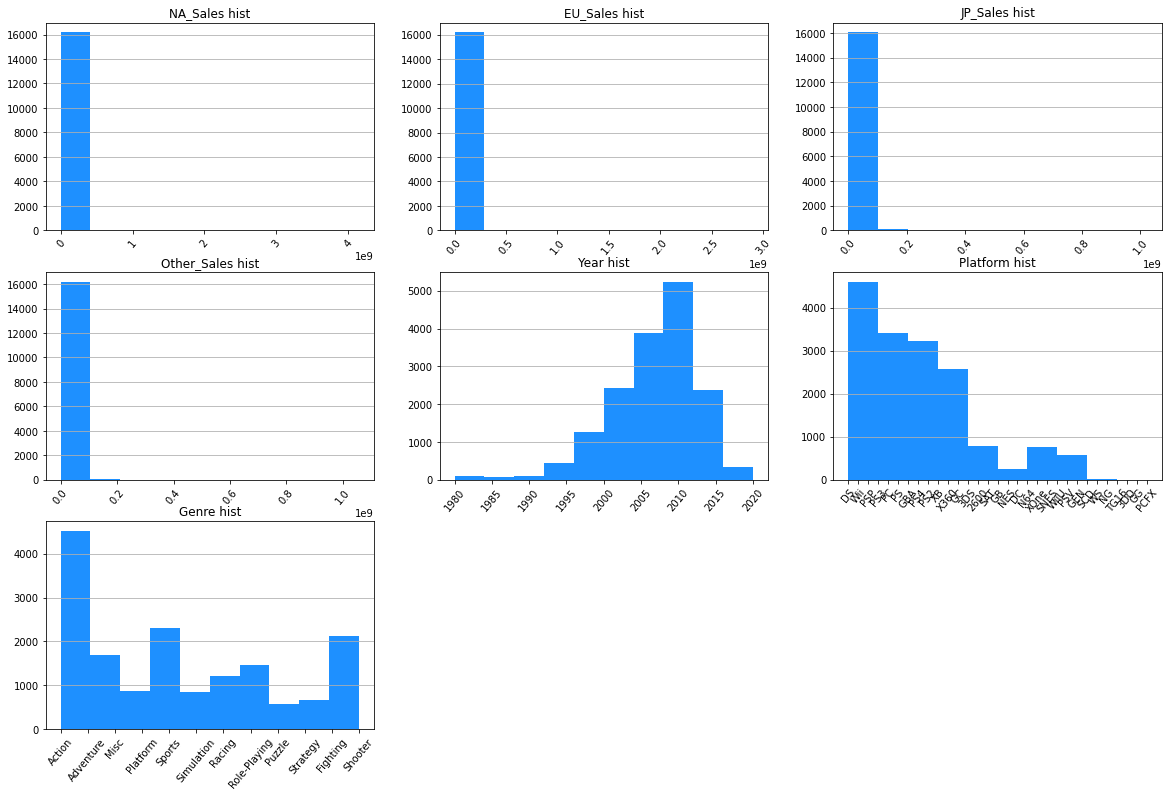

In [ ]:
plt.figure(figsize=(20,13))

for i,col in enumerate(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year','Platform','Genre']]):
  plt.subplot(3,3,i+1)
  plt.hist(df[col],color='dodgerblue')
  plt.title(str(col)+' hist')
  plt.grid(True,axis='y')
  plt.xticks(rotation=50)
plt.show()

- year 컬럼 0~250부분에 데이터가 있는 것을 확인
=> 4자리 숫자로 만들어주어야 함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


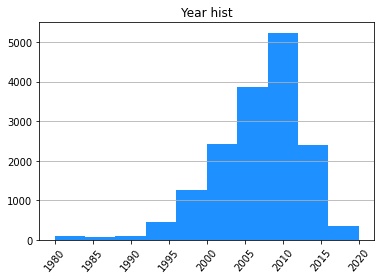


연도
 [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2020]


In [ ]:
# 연도 데이터 조정
def year_cng(x):
  if (x >= 0) & (x <= 20):
    return int(x + 2000)
  elif x <= 100:
    return int(x + 1900)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year_cng) # 함수 적용

plt.hist(df['Year'],color='dodgerblue')
plt.title('Year hist')
plt.grid(True,axis='y')
plt.xticks(rotation=50)
plt.show()

print('\n연도\n',np.sort(df['Year'].unique()))

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000.0,0.0,0.0,0.0,4000000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0,18000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2000000.0,0.0,2000000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000.0,0.0,0.0,0.0,4000000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0,25000000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15000000.0,4000000.0,0.0,1000000.0,20000000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1000000.0,0.0,0.0,0.0,1000000.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44000000.0,19000000.0,3000000.0,13000000.0,79000000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5000000.0,5000000.0,25000000.0,3000000.0,38000000.0


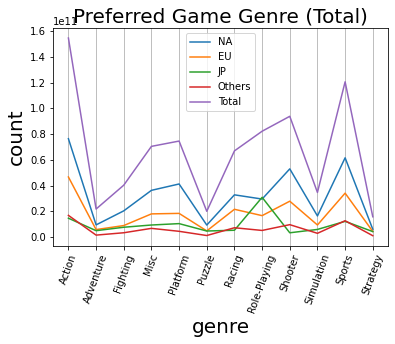

In [ ]:
# 지역별 게임 출고량 분포 확인
group = df.groupby("Genre").sum()
plt.plot(group['NA_Sales'],label="NA")
plt.plot(group['EU_Sales'],label="EU")
plt.plot(group['JP_Sales'],label="JP")
plt.plot(group['Other_Sales'],label="Others")
plt.plot(group['Total_Sales'],label="Total")
plt.xlabel('genre',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("Preferred Game Genre (Total)",fontsize=20)
plt.legend()
plt.show()

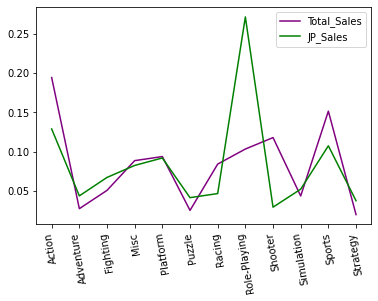

In [ ]:
plt.plot(f_exp_G,label='Total_Sales', color='purple')
plt.plot(f_exp_JP,label='JP_Sales',color='green')
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 100)
plt.show()

1. 북미, 유럽과 그 외 지역은 'Action'장르가 가장 많은 판매량을 볼 수 있었고 다음으로 'sports', 'shooter순이고
2. 일본은 'Role-Playing'장르가 가장 많은 판매량을 볼 수 있었고 다음으로 'Action', 'Sports'순이다.

- 판매량 순위
1) NA_Sales : 북미
2) EU_Sales : 유럽
3) JP_Sales : 일본
4) Other_Sales : 그 외 국가

- 전반적으로 Action,Sports,Shooter,Role-Playing,Platform, 장르를 선호하는 것을 볼 수 있다.
- 특별히 주목할만한 부분은 일본 지역에서 Role-Playing 장르가 인기있는 것을 시각적으로 확인할 수 있다.
- 일본의 경우만 예외적으로 Role-Playing 장르가 가장 인기있는 것을 확인할 수 있다 다만 일본의 경우만 예외적이므로 이것이 통계적으로 의미가 있는지 검증해볼 필요성이 있다

In [ ]:
from scipy.stats import chisquare
df_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].sum()
print('[p-value]')
print("Total과 비교 : ",chisquare(df_genre.JP_Sales, df_genre.Total_Sales)[1])
print("NA와 비교 : ",chisquare(df_genre.JP_Sales, df_genre.NA_Sales)[1])
print("EU와 비교 : ",chisquare(df_genre.JP_Sales, df_genre.EU_Sales)[1])
print("Other과 비교 : ",chisquare(df_genre.JP_Sales, df_genre.Other_Sales)[1])


[p-value]
Total과 비교 :  0.0
NA와 비교 :  0.0
EU와 비교 :  0.0
Other과 비교 :  0.0


1. 귀무가설(H0) : 전체출고량의 분포와 일본지역 판매량의 분포의 차이가 없다
2. 대립가설(H1) : 전체출고량의 분포와 일본지역 판매량의 분포의 차이가 있다.

- 결과를 보면 모두 p-value 값이 0이므로 귀무가설을 기각하고 대립가설을 채택할 수 있다


## 지역별로 선호하는 게임 장르가 있을까?
- 즉 일본의 경우만 예외적으로 Role-Playing 장르가 가장 인기있는 것은 통계적으로 유의미하다

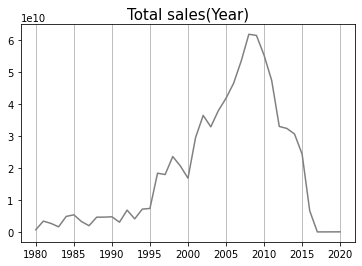

In [ ]:
# 연도별 총 출고량
plt.plot(df.groupby('Year')['Total_Sales'].sum(),color='grey')
plt.title('Total sales(Year)',fontsize=15)
plt.grid(axis='x')
plt.show()

1. 1980년-2000년: 비디오게임이 출시되기 시작하면서 비디오게임 시장이 성장하는 것을 볼 수 있음
2. 2000년-2010년: 비디오게임 시장의 두드러진 성장 추이를 보여줌
3. 2010년-2020년: 비디오게임 시장이 점점 감소하는 추세를 보임


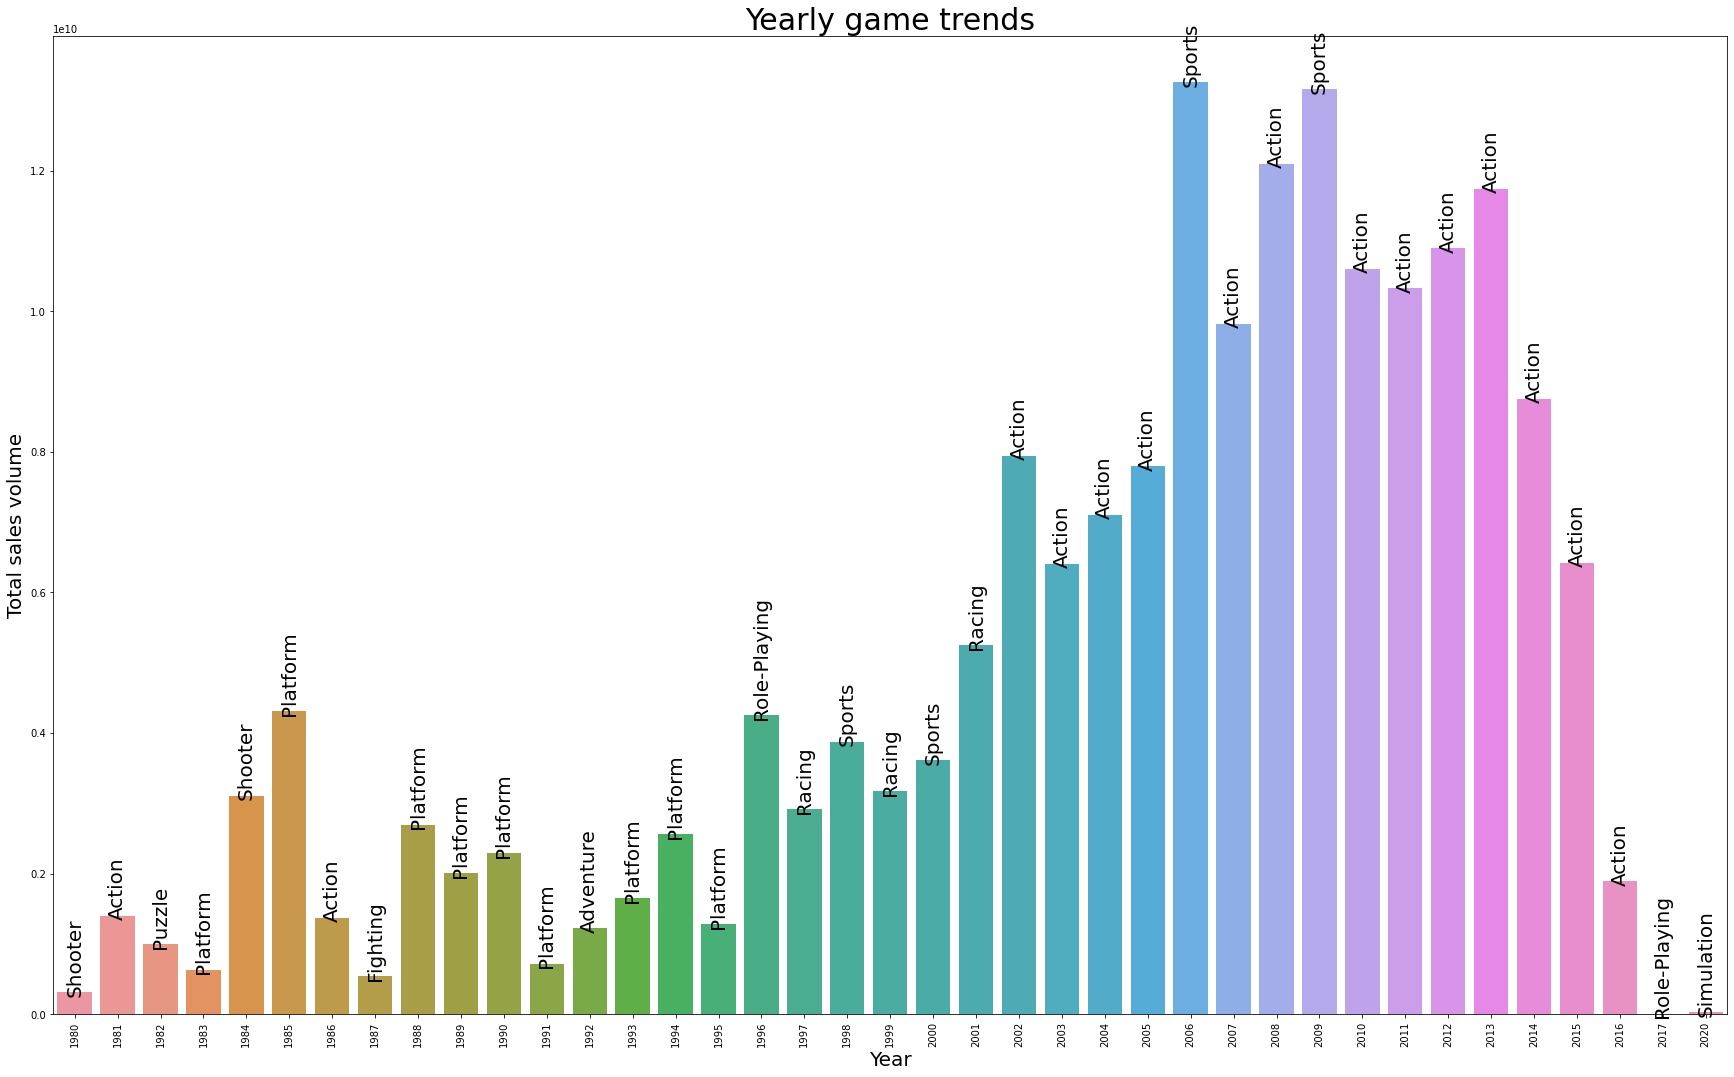

In [ ]:
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Total_Sales']:
    g.text(index, value, str(genre[index]), size=20, rotation= 90, ha="center")
    index += 1
plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

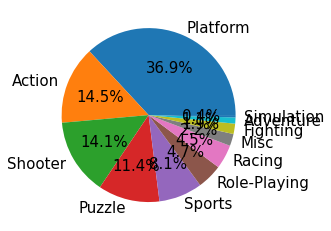

<Figure size 2160x7200 with 0 Axes>

In [ ]:
# 1980-1990 장르별 출고량
ratio1980 = df[df['Year'] <= 1990].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels1980 = ratio1980.index
plt.pie(ratio1980,labels =labels1980, autopct='%.1f%%',textprops={'fontsize': 15})
plt.figure(figsize=(30,100)) 
plt.show()

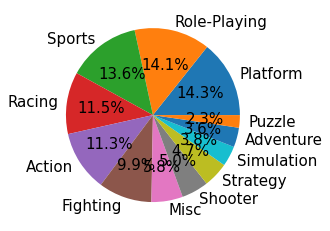

In [ ]:
# 1990-2000 장르별 출고량
ratio1990 = df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels1990 = ratio1990.index
plt.pie(ratio1990,labels =labels1990, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

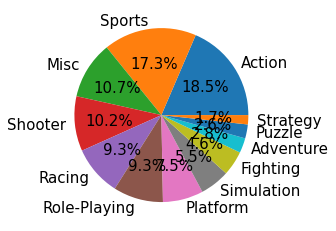

In [ ]:
# 2000-2010 장르별 출고량 비율
ratio2000 = df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels2000 = ratio2000.index
plt.pie(ratio2000,labels =labels2000, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

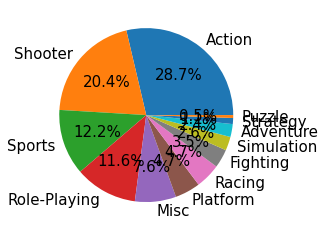

In [ ]:
# 2010-2020 장르별 출고량 비율
ratio2010 = df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels2010 = ratio2010.index
plt.pie(ratio2010,labels =labels2010, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

- 1980년-1990년: platform 장르가 강세를 보이고 있다.
- 1990년-2000년:  Platform 장르의 비율이 낮아졌지만 다양한 장르에서 골고루 소비되기 시작한다.
- 2000년-2010년: Action, sports 장르가 인기를 얻기 시작한다.
- 2010년-2020년: 가장 인기있는 3가지 장르는 순서대로 1.Action 2.Shooter 3.Sport이다.서서히 감소하는 추세를 보이고 있다.

- 이를 통해서 연대별 인기있는 장르가 다른 것을 볼 수 있고, 이는 연대별로 비디오 게임의 트랜드가 변화한다는 것을 추론할 수 있음


In [ ]:
df_genre_year = pd.crosstab(df.Genre, df.Year)
from scipy.stats import chi2_contingency

print('연도와 장르간 독립성 비교 p-value : ',chi2_contingency(df_genre_year)[1])
print('p-value : ',chi2_contingency(df_genre_year)[1])

연도와 장르간 독립성 비교 p-value :  0.0
p-value :  0.0


연도와 장르별 판매량에 대해 카이제곱 독립성 검정을 시행한 결과이다

귀무가설 : 연도와 장르별 판매량 간에 관련이 없다 -> 연도에 따라 장르의 트렌드가 변하지 않는다

대립가설 : 연도와 장르별 판매량 간에 관련이 있다 -> 연도에 따라 장르의 트렌드가 변한다

결과를 보면 p-value 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있다

즉 연도에 따라 장르의 트렌드는 계속 변한다

1. 귀무가설 (H0): 비디오 게임 장르의 트랜드는 변하지 않는다
2. 대립가설 (H1): 비디오 게임 장르의 트랜드는 변한다

- 카이제곱 검정을 시행한 결과 p-value값이 0이 나왔는데, 이에 따라 연도와 장르사이에 관련이 있다는 것을 알수 있음

### 비디오게임 시장에서 게임장르의 트랜드는 계속해서 변화하는 것으로 판단할 수 있다.

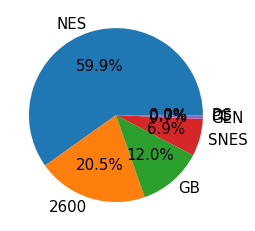

<Figure size 2160x7200 with 0 Axes>

In [ ]:
ratio1980 = df[df['Year'] <= 1990].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels1980 = ratio1980.index
plt.pie(ratio1980,labels =labels1980, autopct='%.1f%%',textprops={'fontsize': 15})
plt.figure(figsize=(30,100)) 
plt.show()

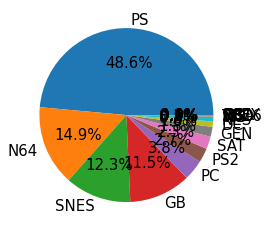

In [ ]:
ratio1990 = df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels1990 = ratio1990.index
plt.pie(ratio1990,labels =labels1990, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

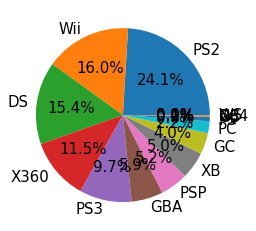

In [ ]:
ratio2000 = df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels2000 = ratio2000.index
plt.pie(ratio2000,labels =labels2000, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

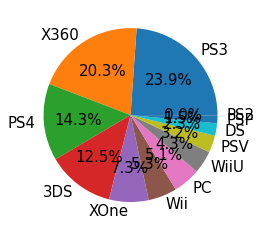

In [ ]:
ratio2010 = df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels2010 = ratio2010.index
plt.pie(ratio2010,labels =labels2010, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

- 상단의 파이차트들은 연도별 구간마다의 플랫폼별 출고량 비율을 나타내고 있다

1. 1980년부터 2000년까지는 NES, PS 각각 하나의 플랫폼이 절반 이상의 비중을 차지하고 있음을 확인할 수 있다

2. 2000-2010 구간은 전보다는 고르게 분포하지만 PS2 플랫폼이 가장 많은 비율을 차지하고 있음을 확인할 수 있다

3. 2010-2020 구간은 플랫폼별로 차지하는 비율이 매우 고르게 분포한다고 볼 수 있다. PS3, X360이 비슷한 비중으로 가장 많은 비율을 차지하고 있음을 확인할 수 있다

In [ ]:
df_platform_year = pd.crosstab(df.Platform, df.Year)
print('각 연도별 구간에서의 플랫폼간 독립성 비교 p-value : ',chi2_contingency(df_platform_year)[1])

각 연도별 구간에서의 플랫폼간 독립성 비교 p-value :  0.0


연도변 구간에서의  플랫폼별 판매량에 대해 카이제곱 독립성 검정을 시행한 결과이다

귀무가설 :연도에 따라 플랫폼의 트렌드가 변하지 않는다

대립가설 : 연도에 따라 플랫폼의 트렌드가 변한다

결과를 보면 p-value 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있다

즉 연도에 따라 플랫폼의 트렌드는 계속 변한다

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df['Sales_Rank'] = df['Total_Sales'].rank(method='min', ascending=False)
df_top = df.sort_values(by='Sales_Rank', ascending=True).head(200)
df_top = df_top.reset_index(drop=True)
df_top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Sales_Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,4.149000e+09,2.902000e+09,3.770000e+08,846000000.0,8.274000e+09,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,2.908000e+09,3.580000e+08,6.810000e+08,77000000.0,4.024000e+09,2.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,1.585000e+09,1.288000e+09,3.790000e+08,331000000.0,3.583000e+09,3.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,1.575000e+09,1.101000e+09,3.280000e+08,296000000.0,3.300000e+09,4.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.127000e+09,8.890000e+08,1.022000e+09,1000000.0,3.039000e+09,5.0
...,...,...,...,...,...,...,...,...,...,...,...
195,Splatoon,WiiU,2015,Shooter,Nintendo,1.550000e+08,1.150000e+08,1.440000e+08,43000000.0,4.570000e+08,196.0
196,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,6.000000e+06,3.290000e+08,6.000000e+06,113000000.0,4.540000e+08,197.0
197,The Last of Us,PS4,2014,Action,Sony Computer Entertainment,1.780000e+08,1.870000e+08,7.000000e+06,82000000.0,4.540000e+08,197.0
198,Guitar Hero III: Legends of Rock,X360,2007,Misc,Activision,3.190000e+08,9.200000e+07,1.000000e+06,42000000.0,4.540000e+08,197.0


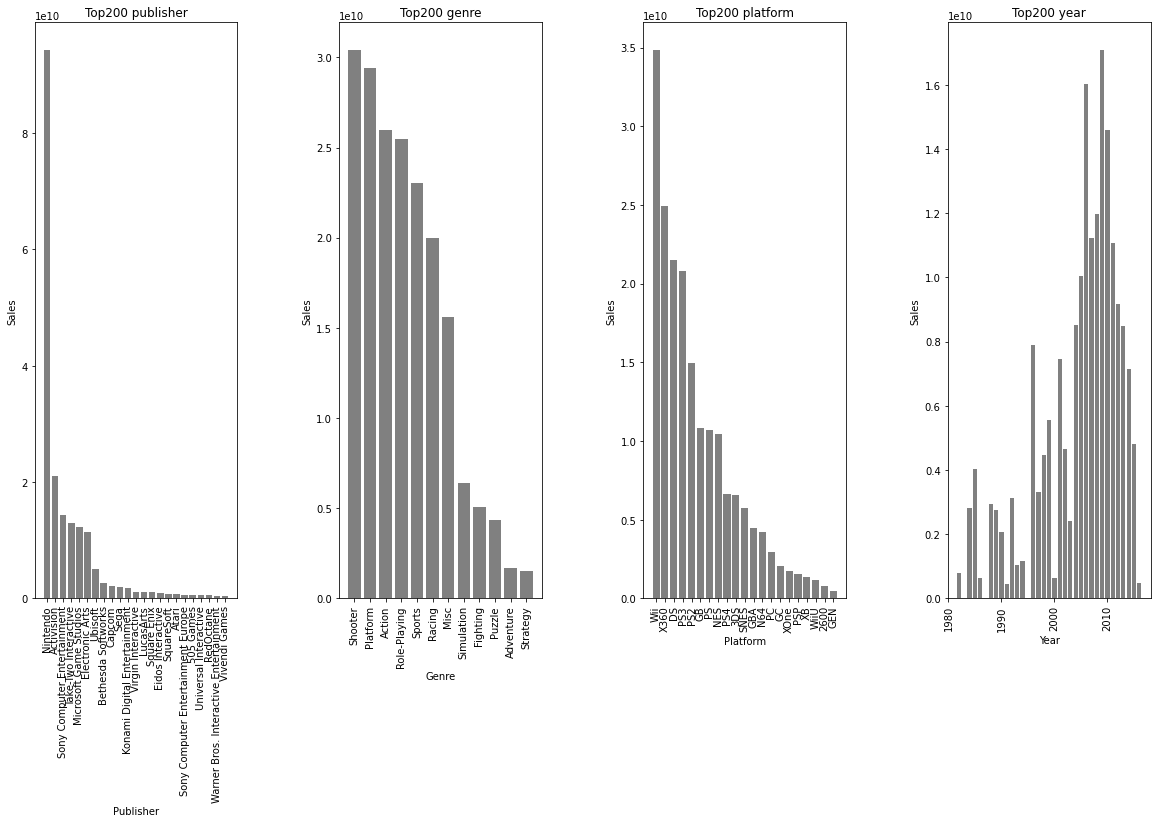

In [ ]:
# 출고량 Top 200에 대해 장르, 플랫폼, 퍼블리셔, 연도별 barplot 시각화
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.bar(df_top.groupby('Publisher').sum().sort_values(by='Total_Sales', ascending=False).index, df_top.groupby('Publisher').sum().sort_values(by='Total_Sales', ascending=False)['Total_Sales'], color='grey')
plt.title("Top200 publisher")
plt.xticks(rotation='vertical')
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.subplot(1,4,2)
plt.bar(df_top.groupby('Genre').sum().sort_values(by='Total_Sales', ascending=False).index, df_top.groupby('Genre').sum().sort_values(by='Total_Sales', ascending=False)['Total_Sales'], color='grey')
plt.title("Top200 genre")
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.subplot(1,4,3)
plt.bar(df_top.groupby('Platform').sum().sort_values(by='Total_Sales', ascending=False).index, df_top.groupby('Platform').sum().sort_values(by='Total_Sales', ascending=False)['Total_Sales'], color='grey')
plt.title("Top200 platform")
plt.xticks(rotation='vertical')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.subplot(1,4,4)
plt.bar(df_top.groupby('Year').sum().sort_values(by='Total_Sales', ascending=False).index, df_top.groupby('Year').sum().sort_values(by='Total_Sales', ascending=False)['Total_Sales'], color='grey')
plt.title("Top200 year")
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

- TotalSales Top200에 대해 각각 장르, 플랫폼, 퍼블리셔 그리고 연도의 수치를 나타내고 있다
- 높은 출고량

1. Publisher : Nintendo가 압도적으로 높은 비율을 차지한다
2. Genre : Platform, Shooter가 비슷한 비율로 가장 많은 비중을 차지한다
3. Platform : Wii가 절반 이상의 비중으로써, 높은 비율을 차지한다
4. Year : 2005-2010 구간이 압도적으로 높은 비율을 차지하는 것을 볼 수 있다


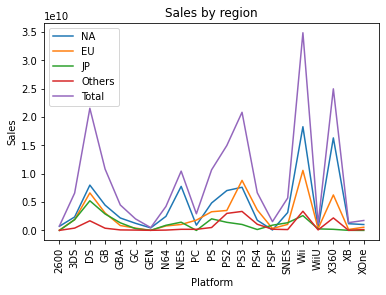

In [ ]:
# 각 지역별(글로벌 포함) platform별 판매량 top200 lineplot 시각화

df_platform = df_top.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].sum()

fig, ax = plt.subplots()
ax.plot(df_platform.index, "NA_Sales", data=df_platform, label="NA")
ax.plot(df_platform.index, "EU_Sales", data=df_platform, label="EU")
ax.plot(df_platform.index, "JP_Sales", data=df_platform, label="JP")
ax.plot(df_platform.index, "Other_Sales", data=df_platform, label="Others")
ax.plot(df_platform.index, "Total_Sales", data=df_platform, label="Total")
plt.title('Sales by region')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

상단의 그래프를 통해 각 지역별로 가장 선호하는 플랫폼을 확인해보면 아래와 같다

북미 : Wii, X360

유럽 : Wii, PS3

일본 : DS

기타 : Wii, PS2, PS3, X360


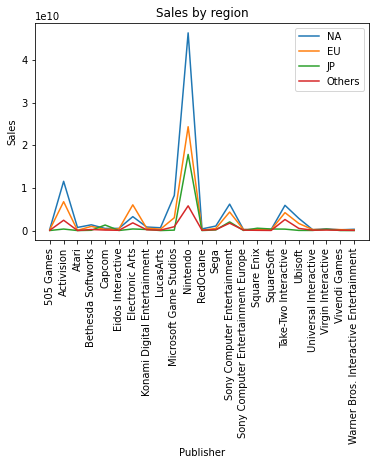

In [ ]:
# 각 지역별(글로벌 포함) publisher별 판매량 top200 lineplot 시각화

df_publisher = df_top.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, ax = plt.subplots()
ax.plot(df_publisher.index, "NA_Sales", data=df_publisher, label="NA")
ax.plot(df_publisher.index, "EU_Sales", data=df_publisher, label="EU")
ax.plot(df_publisher.index, "JP_Sales", data=df_publisher, label="JP")
ax.plot(df_publisher.index, "Other_Sales", data=df_publisher, label="Others")
plt.title('Sales by region')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.show()

- 상단의 그래프를 통해 각 지역별로 가장 선호하는 Publisher을 확인해보면 아래와 같다

1. 북미 : Nintendo

2. 유럽 : Nintendo

3. 일본 : Nintendo

4. 기타 : Nintendo

### 각 지역 모두 Nintendo가 압도적인 비중을 차지하고 있다

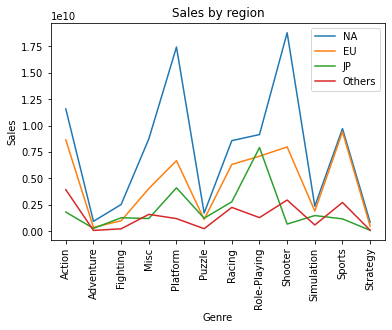

In [ ]:
# 각 지역별(글로벌 포함) genre별 판매량 top200 lineplot 시각화

df_genre = df_top.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, ax = plt.subplots()
ax.plot(df_genre.index, "NA_Sales", data=df_genre, label="NA")
ax.plot(df_genre.index, "EU_Sales", data=df_genre, label="EU")
ax.plot(df_genre.index, "JP_Sales", data=df_genre, label="JP")
ax.plot(df_genre.index, "Other_Sales", data=df_genre, label="Others")
plt.title('Sales by region')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

- 상단의 그래프를 통해 각 지역별로 가장 선호하는 Genre을 확인해보면 아래와 같다

1. 북미 : Shooter, Platform

2. 유럽 : Sports, Action, Shooter

3. 일본 : Role-Playing

4. 기타 : Action


### 종합 결과 

- 북미 : X360 플랫폼으로 Action, Sports, Shooter 장르의 게임 출시
1. Publisher: Nintendo
2. Platform: Wii
3. Genre: Shooter, Platform
4. 출시시기: 최대한 빠르게 


- 유럽 : PS3 플랫폼으로 Action, Sports, Shooter 장르의 게임 출시
1. Publisher: Nintendo
2. Platform: Wii
3. Genre: Sports, Action, Shooter
4. 출시시기: 최대한 빠르게

- 일본 : DS 플랫폼으로 Role-Playing 장르의 게임 출시
1. Publisher: Nintendo
2. Platform: DS
3. Genre: Role-Playing
4. 출시시기: 최대한 빠르게

- 기타 : PS2 플랫폼으로 Action, Sports, Shooter 장르의 게임 출시
1. Publisher: Nintendo
2. Platform: Wii
3. Genre: Action 
4. 출시시기: 최대한 빠르게

-시기는 모든 지역에서의 전반적인 비디오 게임 수요가 줄어들고 있고, 닌텐도 수요도 이전보다 감소하는 추세를 보이고 있으므로 출시 시기는 빠르게 하는 것이 좋다고 판단

### 만약 닌텐도 출판 회사에서 하나의 지역/장르/플랫폼만을 선택해서 출시한다면?

In [ ]:
n_platform = df[df['Publisher'] =='Nintendo']['Platform'].value_counts()
n_genre = df[df['Publisher'] =='Nintendo']['Genre'].value_counts()
n_year = df[df['Publisher'] =='Nintendo']['Year'].value_counts()
n_continent = df[df['Publisher'] =='Nintendo'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
n_sales = df[df['Publisher'] =='Nintendo'].groupby('Year')['Total_Sales'].sum()

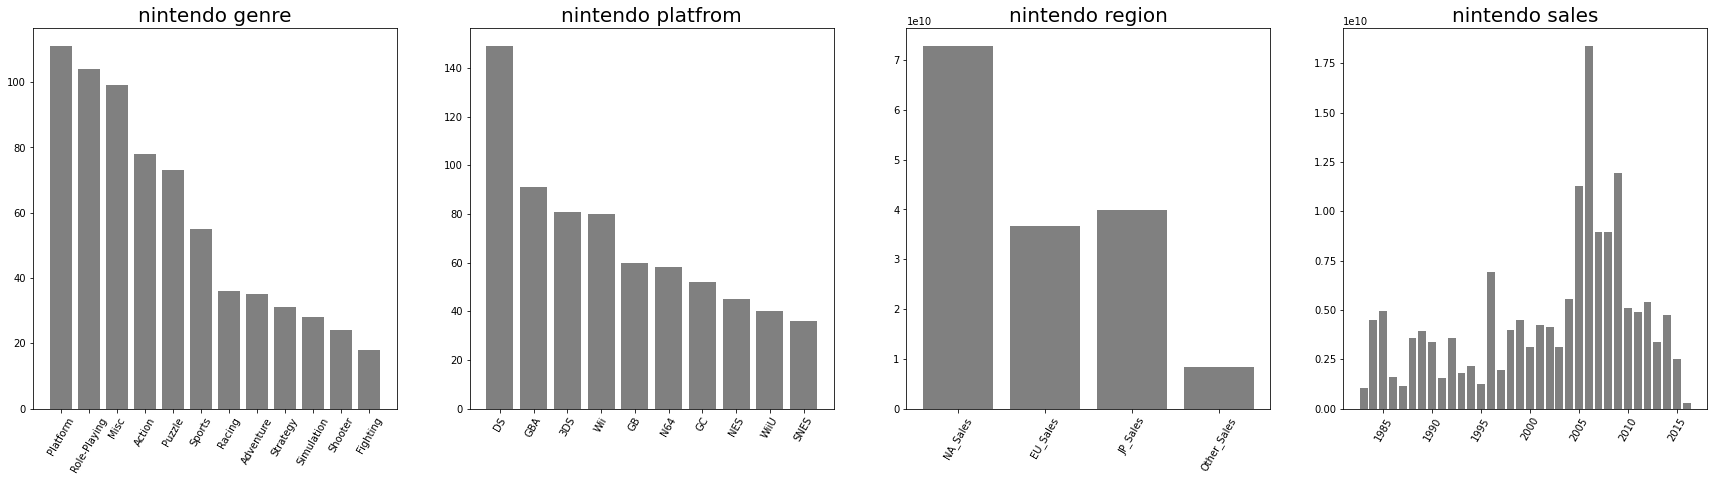

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (30,7))
ax[1].bar(n_platform.index,n_platform, color='grey')
ax[1].set_title('nintendo platfrom',fontsize=20)
ax[0].bar(n_genre.index,n_genre,color='grey')
ax[0].set_title('nintendo genre',fontsize=20)
ax[2].bar(n_continent.index,n_continent,color='grey')
ax[2].set_title('nintendo region',fontsize=20)
ax[3].bar(n_sales.index,n_sales,color='grey')
ax[3].set_title('nintendo sales',fontsize=20)
for i in range(0,4):
  ax[i].xaxis.set_tick_params(rotation=60)

plt.show()

1. Publisher : nintendo
2. Platform : DS
3. Continent : 북미지역
4. 시기: 전반적인 비디오 게임 수요가 줄어들고 있고, 닌텐도 수요도 이전보다 감소하는 추세를 보이고 있으므로 출시 시기는 빠르게 하는 것이 좋다고 판단
5. Genre : Platform or Role-Playing or Misc